# Project Proposal

### Stat 201

In [79]:
# Load package
library(tidyverse)
library(GGally)
library(infer)
library(gridExtra)

In [80]:
# Read in the forest fires data from https://archive.ics.uci.edu/ml/datasets/forest+fires 
forestfires_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv")

head(forestfires_data)

Rows: 517 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): month, day
dbl (11): X, Y, FFMC, DMC, DC, ISI, temp, RH, wind, rain, area

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0
8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0


According to common sense, forest fires occur differently in summer and winter, so we chose the two most representative months: February and August, indicating winter and summer respectively

In [81]:
# Clean and wangle the data set, drop the irrelevant rows and columns
# Since there is an outlier there, which rather affects our analysis, and then filter it out
forestfires <-forestfires_data |>
              filter(month %in% c("feb", "aug"), area < 400) |>
              select(month, area)
head(forestfires)

month,area
<chr>,<dbl>
aug,0
aug,0
aug,0
aug,0
aug,0
aug,0


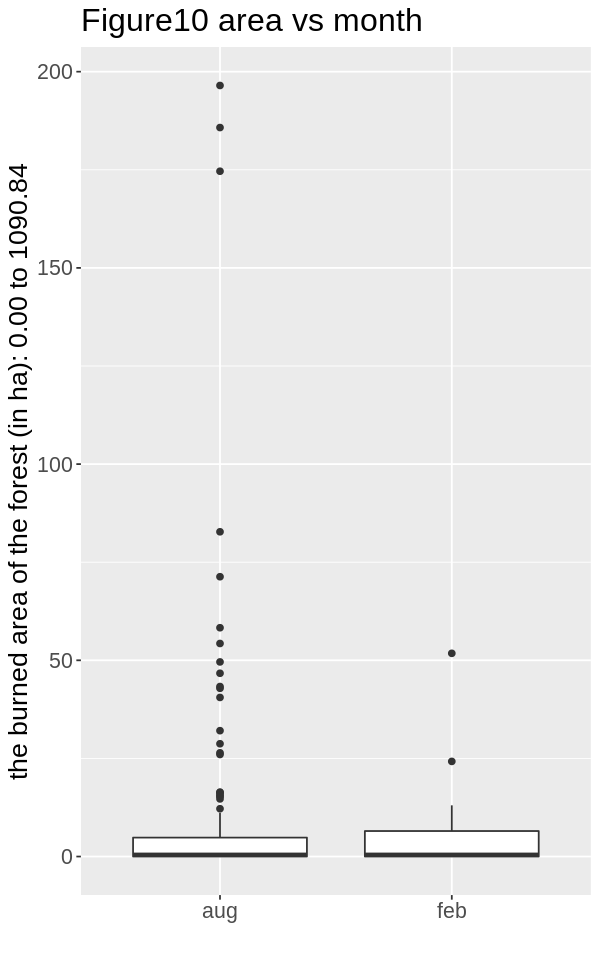

In [82]:
# Creat boxplot of all numeric variables
options(repr.plot.width = 5, repr.plot.height = 8)

area_month_plot <- forestfires|>
    ggplot(aes(y = area, x = month)) +
    geom_boxplot()+
    labs(x = "", y = "the burned area of the forest (in ha): 0.00 to 1090.84") +
    theme(text=element_text(size=16)) +                    
    labs(title = "Figure10 area vs month")

area_month_plot

Keep month as the explanatory variable, temp and area as the response variable. 

In [83]:
# Creat the distribution plot of damage area
options(repr.plot.width = 10, repr.plot.height = 6)

area_dist <- forestfires|> 
    ggplot(aes(x = area, fill = month)) +
    geom_histogram(binwidth = 8, alpha = 0.4)+
    ggtitle("Distribution of Damage Area")+
    geom_vline(data = area_estimates, aes(xintercept = mean, color = month))

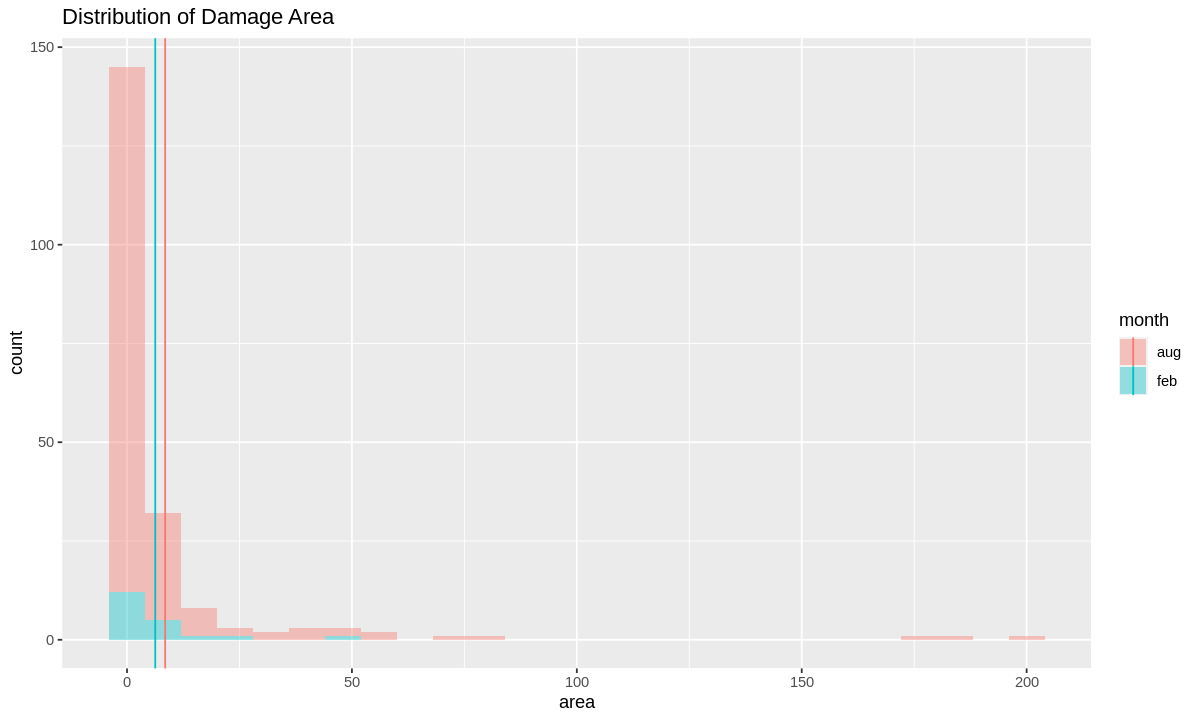

In [84]:
# Distribution of Damage Area
area_dist

In [85]:
# Calculate the mean and standard deviation of damage area
forestfires_summary <- forestfires %>% 
                       mutate(month = as.factor(month)) %>% 
                       summary()

forestfires_summary

 month          area        
 aug:183   Min.   :  0.000  
 feb: 20   1st Qu.:  0.000  
           Median :  0.540  
           Mean   :  8.262  
           3rd Qu.:  5.310  
           Max.   :196.480  

Mean and standard deviation

In [87]:
# Damage area
area_estimates<- forestfires %>%
           group_by(month) %>%
           summarize(mean = mean(area),sd = sd(area))
area_estimates

month,mean,sd
<chr>,<dbl>,<dbl>
aug,8.47929,26.25217
feb,6.27500,12.34251
